In [334]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model

df = pd.read_csv('seeds_dataset.txt', sep=r'\s+', header=None)

In [336]:
print(df.head())

       0      1       2      3      4      5      6  7
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1


In [338]:
print(df.isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64


In [340]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values - 1
y_cat = to_categorical(y, num_classes=3)

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

In [344]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [346]:
#함수형 API
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(64, activation='relu')(input_layer)
x = Dense(32, activation='relu')(x)
output_layer = Dense(3, activation='softmax')(x)
model = Model(inputs=input_layer, outputs=output_layer)

In [348]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [350]:
# 학습 전 평가
loss_before, acc_before = model.evaluate(X_test, y_test, verbose=0)
print(f"[학습 전] 테스트 정확도: {acc_before:.4f}")

[학습 전] 테스트 정확도: 0.1667


In [352]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=16)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2051 - loss: 1.2604 - val_accuracy: 0.4118 - val_loss: 1.0329
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5744 - loss: 0.9617 - val_accuracy: 0.9412 - val_loss: 0.7898
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8303 - loss: 0.7699 - val_accuracy: 0.9412 - val_loss: 0.6351
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8555 - loss: 0.6417 - val_accuracy: 0.9118 - val_loss: 0.5126
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8913 - loss: 0.5275 - val_accuracy: 0.9118 - val_loss: 0.4219
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8978 - loss: 0.4378 - val_accuracy: 0.9118 - val_loss: 0.3579
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9197 - loss: 0.3859 - val_accuracy: 0.9118 - val_loss: 0.3064
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8828 - loss: 0.3346 - val_accuracy: 0.9118 - val_loss: 0.2639
Epoch 9/

In [353]:
# 학습 후 평가
loss_after, acc_after = model.evaluate(X_test, y_test, verbose=0)
print(f"[학습 후] 테스트 정확도: {acc_after:.4f}")

[학습 후] 테스트 정확도: 0.9286


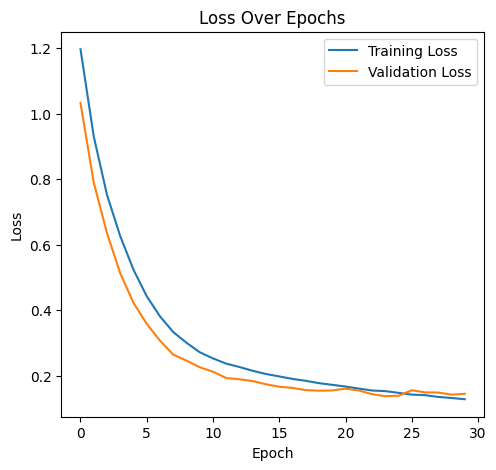

In [356]:
import matplotlib.pyplot as plt
# 학습 과정 시각화
plt.figure(figsize=(12, 5))

# 손실 시각화
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

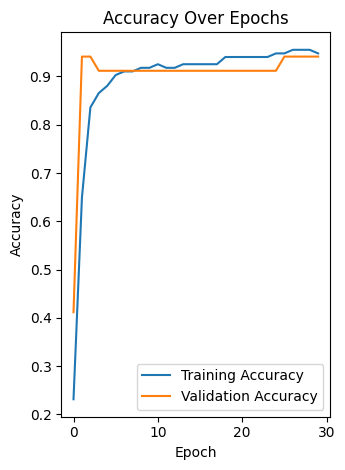

In [358]:
# 정확도 시각화
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

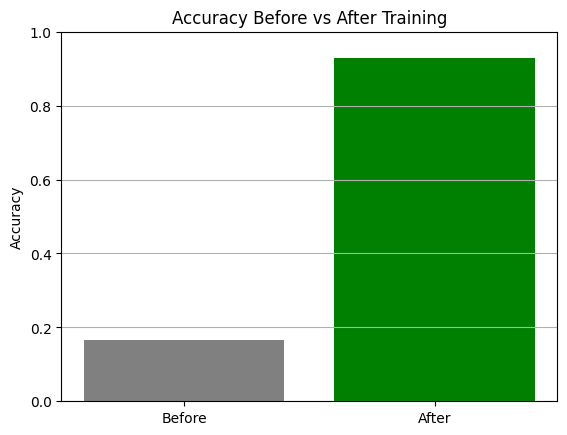

In [360]:
# 학습 전후 비교 시각화
plt.bar(['Before', 'After'], [acc_before, acc_after], color=['gray', 'green'])
plt.title('Accuracy Before vs After Training')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.grid(True, axis='y')
plt.show()